In [1]:
import matplotlib.pyplot as plt
from utilities import *
from uncertainties import  ufloat
from uncertainties.umath import *
import pprint
%matplotlib inline

pp = pprint.PrettyPrinter(indent=4)

## Calcolo della lunghezza d'onda in guida

In [2]:

b = ufloat(0.0101, 0.0005) # cm
a = ufloat(0.0229, 0.0005)
c = 3e8
nu = ufloat(10.5275e9, 0.0001e9)
lambda_guida = calc_lambda_guida(nu, a, c)
lambda_0 = c/nu 
sigma_x = 0.05 # cm
sigma_y = 0.5

Z_g = 377 * lambda_guida / lambda_0 * 2*b/a

print("Z in guida d'onda: {}".format(Z_g))
Z_g = 425

Z in guida d'onda: 425+/-26


## Plot dei risultati

Per il fit è stata utilizzata la formula 

$$
V(x) = V^2_F + V^2_B + 2 V_B V_F \cos(2kx + \Delta\phi)
$$

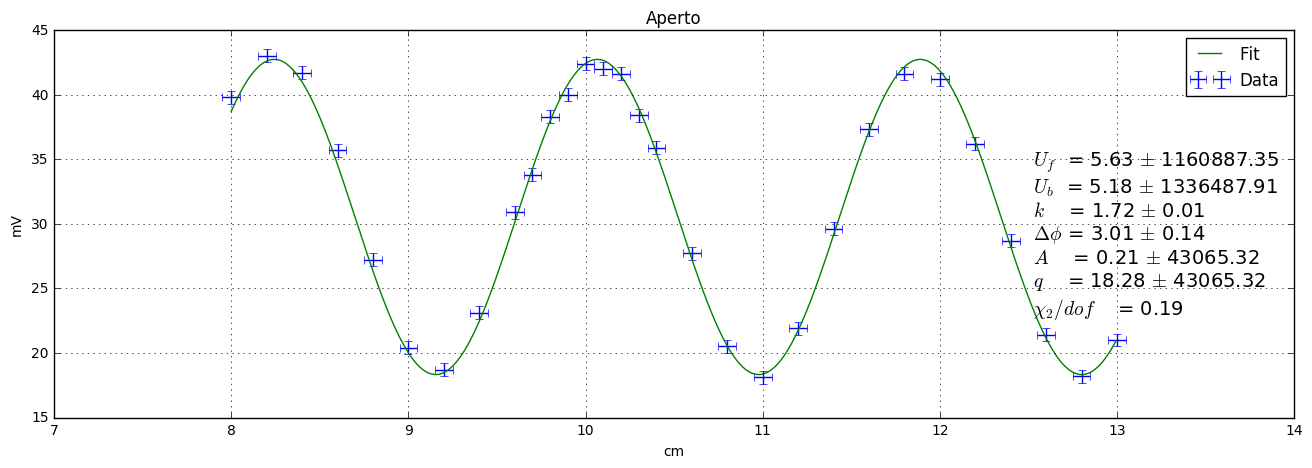

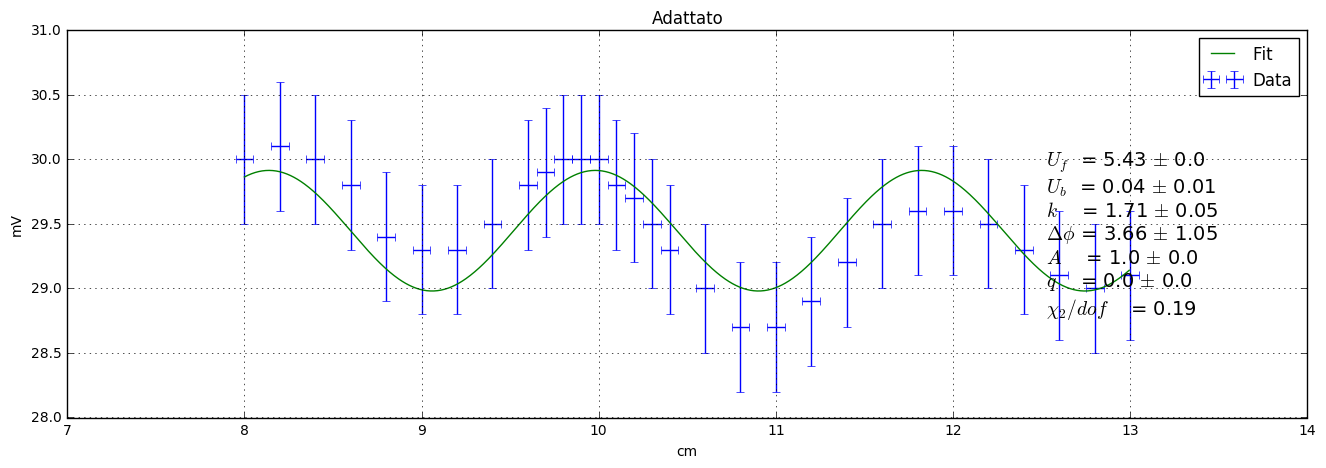

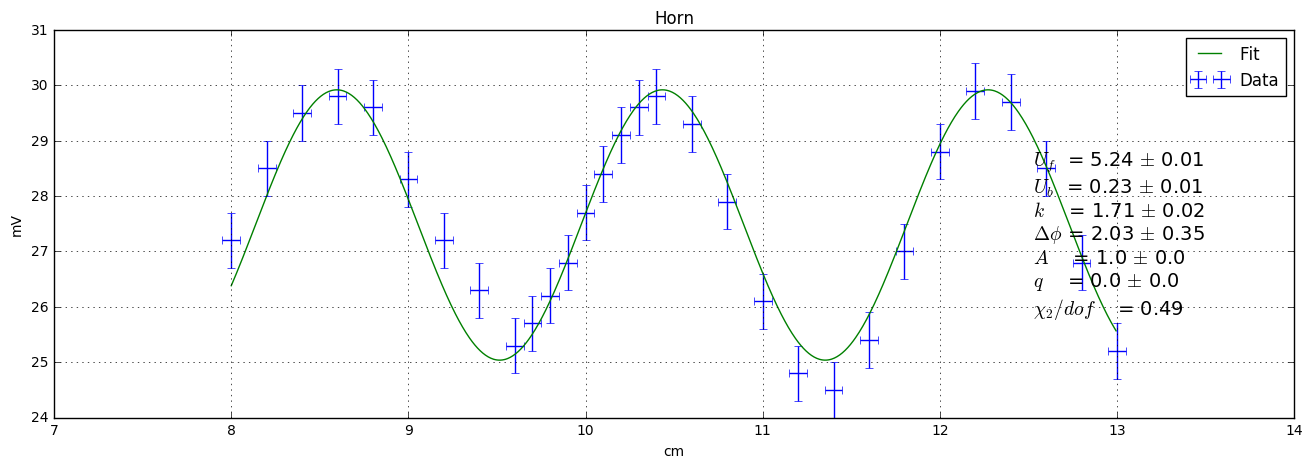

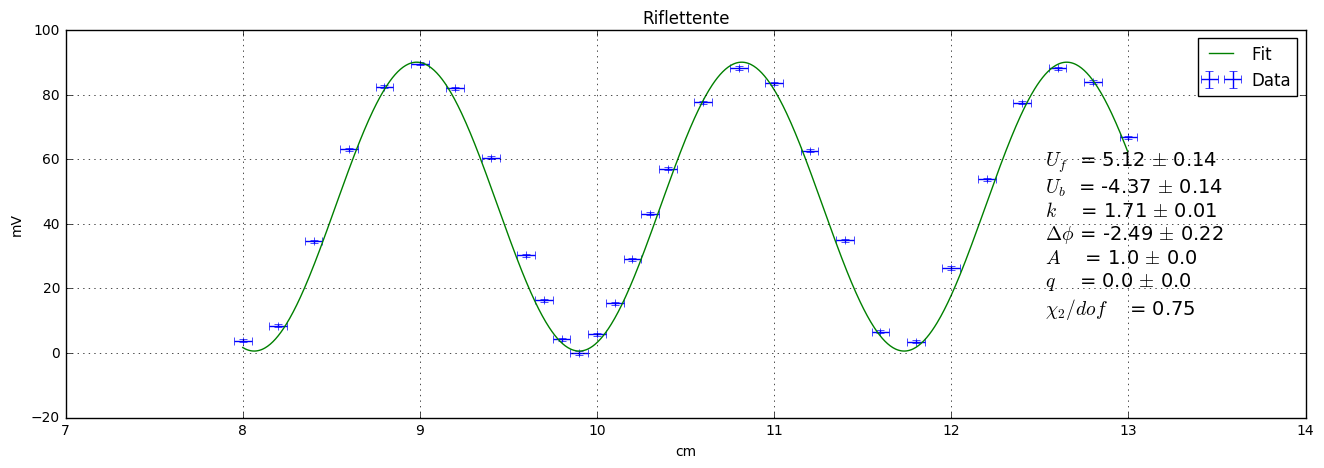

In [15]:
# esegue il fit utilizzando dei parametri iniziali e restituisce i parametri di fit
# results_aperto = execute_fit('data/data_aperto.txt', [5.41,1.13,1.73,2.93,1.], ifixb=(1,1,1,1,0,0))
results_adattato = execute_fit('data/data_adattato.txt', [5.43,0.04,1.71,3.66,1.,0.], ifixb=(1,1,1,1,0,0))
results_horn = execute_fit('data/data_horn.txt', [5.24,0.24,1.72,1.75,1.,0.], ifixb=(1,1,1,1,0,0))
results_riflettente = execute_fit('data/data_riflettente.txt', [5.01,-4.62,1.7035,-2.370,1.,0.], ifixb=(1,1,1,1,0,0))

# fit eseguiti con 7 parametri liberi, tenendo conto della linearità tra la potenza misurata dal crystal
# detector e l'effettivo potenziale delle microonde
results_aperto = execute_fit('data/data_aperto.txt', [4.66,4.68,1.724,2.97,0.27,18.6])
#results_adattato = execute_fit('data/data_adattato.txt', [5.43,0.04,1.71,3.66,1.])
#results_horn = execute_fit('data/data_horn.txt', [5.24,0.24,1.72,1.75,1.])
#results_riflettente = execute_fit('data/data_riflettente.txt', [5.01,-4.62,1.7035,-2.370,1.])

# per plottare i risultati
aperto = plot_data('data/data_aperto.txt', results_aperto, 'Aperto')
aperto.set_size_inches(16,5)
adattato = plot_data('data/data_adattato.txt', results_adattato, 'Adattato')
adattato.set_size_inches(16,5)
horn = plot_data('data/data_horn.txt', results_horn, 'Horn')
horn.set_size_inches(16,5)
riflettente = plot_data('data/data_riflettente.txt', results_riflettente, 'Riflettente')
riflettente.set_size_inches(16,5)


# se voglio stampare i risultati
# pp.pprint(results_aperto)
# pp.pprint(results_adattato)
# pp.pprint(results_horn)
# pp.pprint(results_riflettente)

### Alcuni commenti sui grafici

* Nella configurazione adattata il fit è buono. Il calcolo del SWR e dell'impedenza concordano con ciò che mi aspetto
* Nella configurazione aperto c'è un problema: il fit converge bene, ma i parametri stimati per $U_F$ e $U_B$ non sono esattamente come me li aspetterei. Infatti in una linea aperta mi aspetto che l'impedenza del carico sia $ Z_r \rightarrow \infty $ o $ Z_r \gg 1 $. Ho provato ad utilizzare una funzione di fit diversa, in cui suppongo che la relazione tra la potenza misurata dal crystal detector $ Y(x) $ abbia una relazione lineare generale con l'ampiezza delle microonde nella guida. Ciò signfica che se chiamo $ U(x) $ il potenziale in guida d'onda, uso una relazione di fit del tipo 
$$
Y(x) = m \langle U(x) \rangle^2 + q
$$
questo si traduce in una funzione di fit con più parametri e nonostante converga con un buon $\chi^2$ non ho una stima degli errori sufficientemente buona. Nonostante tutto il calcolo dell'impedenza e del SWR sono in accordo con ciò che mi aspetterei.

* Nella configurazione riflettente invece ottengo una buona stima dell'onda forward e l'onda back.
* Nella configurazione horn il fit converge ma si può osservare che l'adattamento della funzione ai dati ha un problema nel secondo minimo. Questo minimo ha un potenziale minore rispetto al primo e una situazione del genere si verifica anche con la configurazione adattata. Tuttavia, in quest'ultimo caso, l'ampiezza $ U(x) $ è piccola rispetto alle incertezze e una variazione del minimo non è apprezzabile. Nel caso invece della configurazione con horn questo problema si ripresenta e bisogna dargli un'interpretazione.

## Calcolo del SWR

L'SWR è stato calcolato come:
$$
SWR = \frac{|V_{max}|}{|V_{min}|} = \frac{|V_F + V_B|}{|V_F - V_B|} 
$$

Se $ SWR \rightarrow 1 $ allora l'adattamento è buono.
Se $ SWR \rightarrow +\infty $ allora $V_F \approx V_B$ e quindi ho una linea aperta.
Se $ SWR \rightarrow 1 $ allora l'adattamento è buono.


In [11]:
swr_aperto = rapporto_onda_stazionaria(results_aperto['U_F'], results_aperto['U_B'])
swr_adattato = rapporto_onda_stazionaria(results_adattato['U_F'], results_adattato['U_B'])
swr_horn = rapporto_onda_stazionaria(results_horn['U_F'], results_horn['U_B'])
swr_riflettente = rapporto_onda_stazionaria(results_riflettente['U_F'], results_riflettente['U_B'])

z_aperto = impedenza_carico(Z_g, results_aperto['U_F'], results_aperto['U_B'], results_aperto['delta_phi'])
z_adattato = impedenza_carico(Z_g, results_adattato['U_F'], results_adattato['U_B'], results_adattato['delta_phi'])
z_riflettente = impedenza_carico(Z_g, results_riflettente['U_F'], results_riflettente['U_B'], results_riflettente['delta_phi'])
z_horn = impedenza_carico(Z_g, results_horn['U_F'], results_horn['U_B'], results_horn['delta_phi'])

output = """
Z aperto        = {}
Z adattato      = {}
Z riflettente   = {}
Z horn          = {}

SWR aperto      = {}
SWR adattato    = {}
SWR riflettente = {}
SWR horn        = {}
""".format(
z_aperto,
z_adattato,
z_riflettente,
z_horn,
swr_aperto,
swr_adattato,
swr_riflettente,
swr_horn
)
print(output)


Z aperto        = [17.906769270273148, 27.170069497285105]
Z adattato      = [419.17863748415192, -3.300183771492724]
Z riflettente   = [311.21162465520484, 1178.7268173795931]
Z horn          = [407.1293204156965, 32.480406601036137]

SWR aperto      = 23.83121382565177
SWR adattato    = 1.0159804177801286
SWR riflettente = 0.0798550609571239
SWR horn        = 1.0931820741620375



## Commenti sull'impedenza

Come si può osservare il calcolo dell'impedenza del carico fornito dal pdf non si accorda bene con ciò ch mi aspetterei di osservare. Questo significa o che ho sbagliato a calcolare o che non sto calcolando quello che effettivamente voglio ottenere. Infatti, utilizzando la formula dell'impedenza del carico ricavata a lezione, i risultati sono in linea con ciò che mi aspetterei. 

In [12]:
# calcolo alternativo:
z_riflettente_alternativo = Z_g*(results_riflettente['U_F']+results_riflettente['U_B'])/(results_riflettente['U_F']-results_riflettente['U_B'])
z_aperto_alternativo = Z_g*(results_aperto['U_F']+results_aperto['U_B'])/(results_aperto['U_F']-results_aperto['U_B'])
z_adattato_alternativo = Z_g*(results_adattato['U_F']+results_adattato['U_B'])/(results_adattato['U_F']-results_adattato['U_B'])
z_horn_alternativo = Z_g*(results_horn['U_F']+results_horn['U_B'])/(results_horn['U_F']-results_horn['U_B'])

print("""
Z aperto        = {}
Z adattato      = {}
Z riflettente   = {}
Z horn          = {}
""".format(
z_aperto_alternativo,
z_adattato_alternativo,
z_riflettente_alternativo,
z_horn_alternativo
))


Z aperto        = 10128.265875902001
Z adattato      = 431.7916775565546
Z riflettente   = 33.93840090677766
Z horn          = 464.6023815188659

